<font size="+3" ><b> <center>Factors influencing campus placement</u></center></b></font>

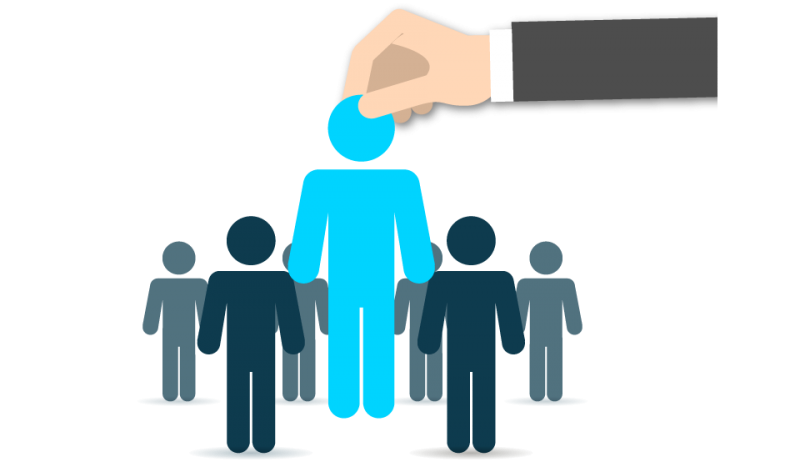

## About the data
This data set consists of Placement data of students in a XYZ campus. It includes secondary, higher secondary school percentage, specialization, degree specialization, Work experience and salary offered to the students placed.

## Objective
This Kernel will help us find out the statistically significant factors that affect the placement of the students. We will start by exploring the data and finding the relationship with the placement of the student, so let us get started.

## EDA
In EDA phase, we will explore the data and try to get insights from it and find out the relationship between the variables.
1. Does the selection of education board impact chances of getting placed?
2. Correlation between the marks scored in college and MBA with salary.
3. Impact of gender, specialization, and work experience on placements.

## **Before we start**
### If you like my work, please upvote this kernel since it will keep me motivated to perform more in-depth research on other datasets and produce more accurate models..

required functions

In [ ]:
def check_categorical_dependency(crosstab_table,confidence_interval):
    stat, p, dof, expected = scipy.stats.chi2_contingency(crosstab_table)
    print('Chi-Squared statistic value = {}'.format(stat))
    print('P - value = {}'.format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pandas_profiling
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize']=10,5

## Loading and exploring the data.

In [ ]:
df=pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
print('DataFrame shape:',df.shape)
df.head()

Dataframe.describe(include='all'), gives us all the required descriptive stats
which include
1. the total number of non NULL values.
2. If it is a categorical variable, the number of unique values in it.
3. Most frequent value in the categorical variable.
4. Descriptive statistics like minimum, maximum, mean, standard deviation, (25-50-75) quantiles.

In [ ]:
df.describe(include='all')

In [ ]:
placement_percent=df.status.value_counts(normalize=True)
sns.barplot(placement_percent.index,placement_percent.values)
plt.xlabel('Placement Status')
plt.ylabel('Percentage')
plt.title('Placement Percentage')
# plt.tight_layout()
print(placement_percent)

### Inference
Around 70% of the students are placed.

In [ ]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.countplot(df.gender)
plt.title('Gender count')

plt.subplot(1,3,2)
sns.countplot(df.gender,hue=df.status)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender v/s Placement count')

plt.subplot(1,3,3)
female_candi= df[df.gender=='F'].shape[0]
female_placed=df[(df.gender=='F')&(df.status=='Placed')].shape[0]
male_candi= df[df.gender=='M'].shape[0]
male_placed=df[(df.gender=='M')&(df.status=='Placed')].shape[0]

f_place_per= (female_placed/female_candi)*100
m_place_per= (male_placed/male_candi)*100

sns.barplot(x=['M','F'],y=[m_place_per,f_place_per])
plt.xlabel('Gender')
plt.ylabel('percentage')
plt.title('Gender v/s Placement percentage')
plt.tight_layout()

### Inference
1. (139)65% of the students are male.
2. 72% of male students are placed when compared to 63% of female students

In [ ]:
male_df=df[df['gender']=='M']
female_df=df[df['gender']=='F']

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(male_df.salary,hist=False,color='#3274a1')
sns.distplot(female_df.salary,hist=False,color='#e1812c')
plt.xlabel('salary')
plt.title('salary based on gender')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#e1812c', label='female')
blue_patch = mpatches.Patch(color='#3274a1', label='male')
plt.legend(handles=[blue_patch,red_patch])

plt.subplot(1,2,2)
plt.ylim((250000,300000))
plt.bar(x='male',height=male_df.salary.mean(),color='#3274a1')
plt.bar(x='female',height=female_df.salary.mean(),color='#e1812c')
plt.xlabel('gender')
plt.ylabel('salary')
plt.title('Gender vs mean salary')
plt.tight_layout()

### Inference
1. mean and median income of female students is less than male students
2. male(mean, median) = (298910, 270000)
3. female(mean, median) = (267291, 250000)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='workex',data=df,hue='status')
plt.title('Work experience v/s placement')

### Inference
Work experience increases the propability of getting placed.

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.ylim((50,75))
ssc=df.groupby('ssc_b')['ssc_p'].mean()
sns.barplot(x=ssc.index,y=ssc.values)
plt.ylabel('percentage')
plt.title('ssc board v/s percentage scored')

plt.subplot(1,2,2)
plt.ylim((60,70))
hsc=df.groupby('hsc_b')['hsc_p'].mean()
sns.barplot(x=hsc.index,y=hsc.values)
plt.ylabel('percentage')
plt.title('hsc board v/s percentage scored')
plt.tight_layout()

### Inference
Percentage of marks scored by students in different boards of secondary education are similar.

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(1,4,1)
sns.violinplot(x='status',y='ssc_p',data=df)
plt.title('status v/s ssc percentage')


plt.subplot(1,4,2)
sns.violinplot(x='status',y='hsc_p',data=df)
plt.title('status v/s higher secondary percentage')

plt.subplot(1,4,3)
sns.violinplot(x='status',y='degree_p',data=df)
plt.title('status v/s degree percentage')

plt.subplot(1,4,4)
sns.violinplot(x='status',y='mba_p',data=df)
plt.title('status v/s MBA percentage')


plt.tight_layout()

### Inference
1. Students who are placed, usually score higher than the students who are not placed.
2. It does not hold ground when it comes to MBS percentages, both the student groups(placed and not placed) score similarly in MBA.

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.ylim((250000,310000))
degree_salary=df.groupby('degree_t')['salary'].mean()
sns.barplot(x=degree_salary.index, y=degree_salary.values)
plt.xlabel('undergrad degree')
plt.ylabel('salary')
plt.title('undergrad degree v/s salary')

plt.subplot(1,3,2)
plt.ylim((250000,310000))
spec_salary=df.groupby('specialisation')['salary'].mean()
sns.barplot(x=spec_salary.index, y=spec_salary.values)
plt.xlabel('specialisation')
plt.ylabel('salary')
plt.title('specialisation v/s salary')

plt.subplot(1,3,3)
plt.ylim((250000,310000))
exp_salary=df.groupby('workex')['salary'].mean()
sns.barplot(x=exp_salary.index, y=exp_salary.values)
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('work experience v/s salary')


plt.tight_layout()

### Inference
1. Students with under graduation in science and technology are paid more than students from commerce&management and others.
2. MBA specialisation in Marketing and finance pays more than Marketing and HR.
3. Students with work experience are paid more than freshers.

In [ ]:
x_p=df.loc[df['status']=='Placed',['ssc_p']].values
y_p=df.loc[df['status']=='Placed',['hsc_p']].values
z_p=df.loc[df['status']=='Placed',['degree_p']].values

x_n=df.loc[df['status']!='Placed',['ssc_p']].values
y_n=df.loc[df['status']!='Placed',['hsc_p']].values
z_n=df.loc[df['status']!='Placed',['degree_p']].values

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_p,y_p,z_p,c='#3274a1')
ax.scatter(x_n,y_n,z_n,c='#e1812c')
ax.set_xlabel('ssc percentage')
ax.set_ylabel('hsc percentage')
ax.set_zlabel('degree percentage')
ax.set_title('ssc% - hsc% - degree% - placement')

red_patch = mpatches.Patch(color='#e1812c', label='Not Placed')
blue_patch = mpatches.Patch(color='#3274a1', label='Placed')
plt.legend(handles=[blue_patch,red_patch])


### Inference
Students who score better in secondary and undergraduation have higher probability of getting placed.

## Statistical tests to findout significance of variables

### Chi square test for categorical variables
A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other.

Let’s consider a scenario where we need to determine the relationship between the independent category feature (predictor) and dependent category feature(response). In feature selection, we aim to select the features which are highly dependent on the response.

In [ ]:
cat_variables = df.describe(include='O').columns
cat_variables=cat_variables.drop('status')

In [ ]:
for var in cat_variables:
    crosstab=pd.crosstab(df[var],df['status'])
    print(var)
    check_categorical_dependency(crosstab,0.95)
    print('\n')

### Inference
1. gender, ssc_b, hsc_b, hsc_s, degree_t doesnot impact the placement oppurtunity.
2. workexp, and specialisation has significant impact on placement.

### Logistic regression to find out significant numerical variables.
logistic regression can be used to find out the significant variables that statistically impact the target.
if P is less than 0.05 the variable is significant, if >0.05 it is not significant and can be omitted from the model.

In [ ]:
model= sm.GLM.from_formula('status~ssc_p+hsc_p+degree_p+etest_p+mba_p',family=sm.families.Binomial(),data=df)#
result=model.fit()
result.summary()

### Inference
all the numerical variables are significant except etest_p.

### Removing unwanted colummns

In [ ]:
df.drop(['sl_no','mba_p','gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t','salary'],axis=1,inplace=True)

In [ ]:
y=df['status']
df.drop('status',axis=1, inplace=True)
x=pd.get_dummies(df,drop_first=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=105)


In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print(accuracy_score(y_test,rf.predict(X_test)))

Model is performace is really good

Hope you would have learned something from kernal...Please upvote my kernal...Your support mean a lot to me!!!